Saving emisi.csv to emisi (18).csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Ville (L/100 km)      642 non-null    float64
 1   Route (L/100 km)      642 non-null    float64
 2   kombinasi (L/100 km)  642 non-null    float64
 3   Emisi CO2 (g/km)      642 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 20.2 KB


,Ville (L/100 km),Route (L/100 km),kombinasi (L/100 km),Emisi CO2 (g/km)
0,8.1,6.5,7.4,172
1,8.9,6.5,7.8,181
2,11.1,8.3,9.9,230
3,12.6,9.4,11.2,263
4,13.8,11.2,12.4,291


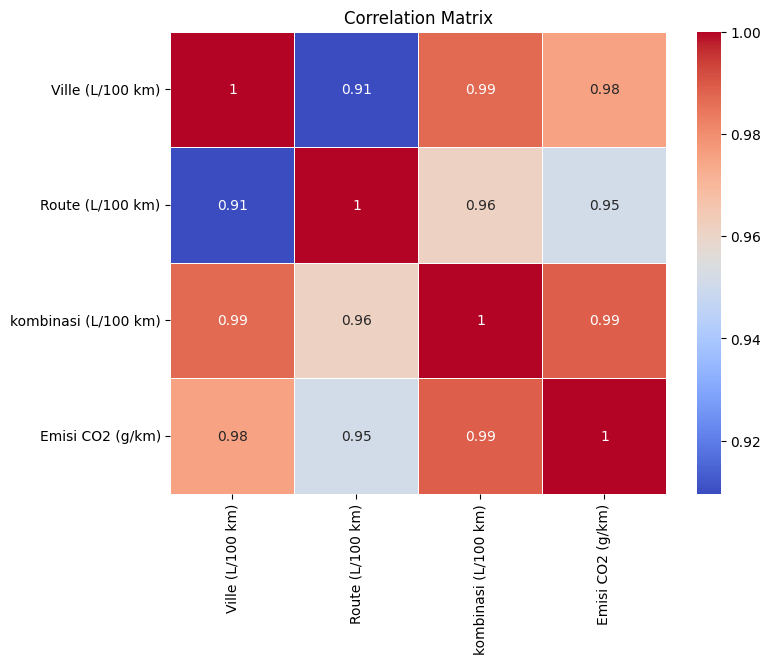

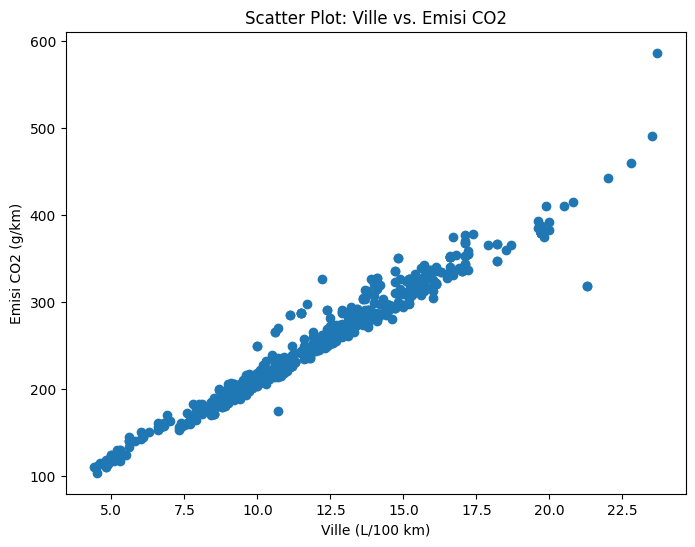

Linear Regression - Mean Squared Error: 144.15545247162498
Linear Regression - R-squared: 0.9668465260920267


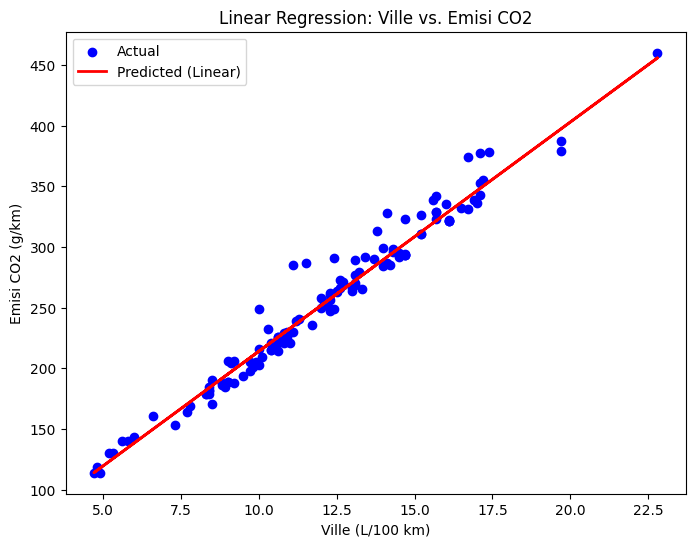

Polynomial Regression (degree 2) - Mean Squared Error: 145.05456846123693
Polynomial Regression (degree 2) - R-squared: 0.9666397436360685


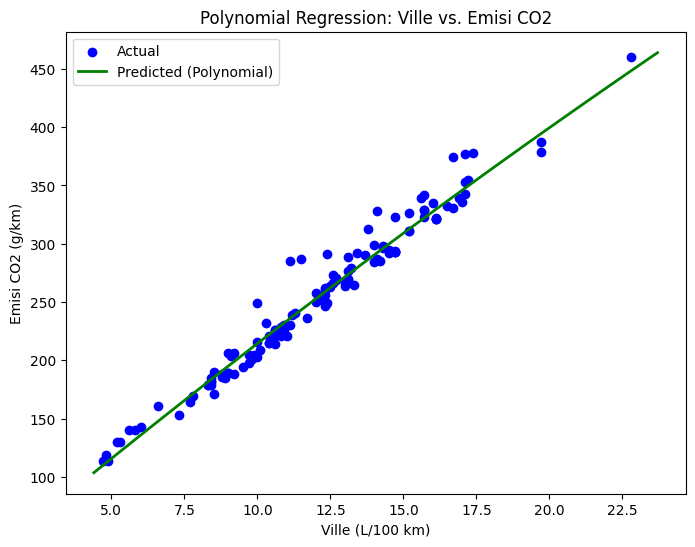

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Import Data dalam format CSV
from google.colab import files
uploaded = files.upload()

# Membaca file CSV (gantilah 'emisi.csv' dengan nama file yang diunggah)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

# Menampilkan informasi dasar data
df.info()
display(df.head())

# Correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Ville (L/100 km)'], df['Emisi CO2 (g/km)'])
plt.title('Scatter Plot: Ville vs. Emisi CO2')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.show()

# Prepare the data
X = df[['Ville (L/100 km)']]
y = df['Emisi CO2 (g/km)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)
y_pred_linear = model_linear.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print(f'Linear Regression - Mean Squared Error: {mse_linear}')
print(f'Linear Regression - R-squared: {r2_linear}')

# Visualize Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred_linear, color='red', linewidth=2, label='Predicted (Linear)')
plt.title('Linear Regression: Ville vs. Emisi CO2')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.legend()
plt.show()


# Polynomial Regression
degree = 2  # You can adjust the degree of the polynomial
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Polynomial Regression (degree {degree}) - Mean Squared Error: {mse_poly}')
print(f'Polynomial Regression (degree {degree}) - R-squared: {r2_poly}')

# Visualize Polynomial Regression
plt.figure(figsize=(8, 6))  # Create a new figure for Polynomial Regression
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_plot, y_plot, color='green', linewidth=2, label='Predicted (Polynomial)')
plt.title('Polynomial Regression: Ville vs. Emisi CO2')
plt.xlabel('Ville (L/100 km)')
plt.ylabel('Emisi CO2 (g/km)')
plt.legend()
plt.show()

# Menambahkan observer untuk event upload file
output = widgets.Output()
uploader.observe(handle_upload, names='value')

1. **DataFrame Head:**
   - Menampilkan lima baris pertama dari DataFrame yang diunggah, memberikan gambaran umum tentang struktur dan isi data.
2. **DataFrame Describe:**
   - Menyediakan statistik deskriptif dari DataFrame, seperti nilai rata-rata, deviasi standar, dan quartiles, yang membantu dalam memahami distribusi dan rentang nilai di dalam data.
3. **Jumlah Nilai Null:**
   - Menunjukkan jumlah nilai yang hilang (null) dalam setiap kolom, penting untuk mengetahui kualitas data dan memutuskan langkah-langkah pembersihan yang diperlukan.
4. **Matriks Korelasi:**
   - Visualisasi matriks korelasi dalam bentuk heatmap, yang menunjukkan hubungan antara variabel-variabel dalam DataFrame. Nilai mendekati 1 atau -1 menunjukkan hubungan linear yang kuat.
5. **Scatter Plot (Ville vs. Emisi CO2):**
   - Menggambarkan hubungan antara konsumsi bahan bakar (Ville) dan emisi CO2. Visualisasi ini menunjukkan pola atau tren dalam data.
6. **Linear Regression Output:**
   - Menyediakan nilai Mean Squared Error (MSE) dan R-squared untuk model regresi linear. MSE yang rendah menunjukkan akurasi prediksi yang baik, sementara R-squared menunjukkan proporsi variansi data yang dapat dijelaskan oleh model.
7. **Visualisasi Regresi Linear:**
   - Scatter plot dengan garis regresi linear yang menunjukkan perbandingan antara nilai aktual dan prediksi. Ini membantu dalam mengevaluasi seberapa baik model linear bekerja.
8. **Polynomial Regression Output:**
   - Menampilkan MSE dan R-squared untuk model regresi polinomial. Metrik ini digunakan untuk membandingkan efektivitas model polinomial dengan model linear.
9. **Visualisasi Regresi Polinomial:**
   - Scatter plot dengan garis regresi polinomial yang menunjukkan prediksi berdasarkan model polinomial. Ini menggambarkan bagaimana model polinomial dapat menangkap pola yang lebih kompleks dibandingkan dengan model linear.